# Time map of chord events

Goal: compute and visualize a time map of chord events.

This provides an overview of timing of events without the need of zooming the plot.

[Time Maps: Visualizing Discrete Events Across Many Timescales](https://districtdatalabs.silvrback.com/time-maps-visualizing-discrete-events-across-many-timescales) by Max Watson.

## Dataset

Reference Annotations: The Beatles

- http://isophonics.net/content/reference-annotations-beatles

### Format
- TSV file, each line describes a single segment with a chord
- columns: `start_time end_time mirex_chord_label`
- example: `2.9632 6.1260 G:sus4(b7)`
- time is in float seconds
- label syntax: https://code.soundsoftware.ac.uk/attachments/download/330/chris_harte_phd_thesis.pdf

## Output:

- time map on:
  - the whole dataset
  - each song
  - blocks of a single song (how the distribution changes)
- plot type/scale:
  - scatter plot, 2D histogram plot
  - linear scale

In [5]:
%pylab inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pylab.rcParams['figure.figsize'] = (16, 12)

Populating the interactive namespace from numpy and matplotlib


In [6]:
data_dir = 'data/beatles/chordlabs/'

In [7]:
file = 'A_Hard_Day_s_Night/03-If_I_Fell.lab'
def read_chord_file(path):
    return pd.read_csv(path, sep=' ', header=None, names=['start','end','chord'])
df = read_chord_file(data_dir + file)

In [8]:
df.head()

,start,end,chord
0,0.0000,1.1350,N
1,1.1350,1.7208,N
2,1.7208,3.9210,Eb:min
3,3.9210,6.1913,D
4,6.1913,8.4500,Db


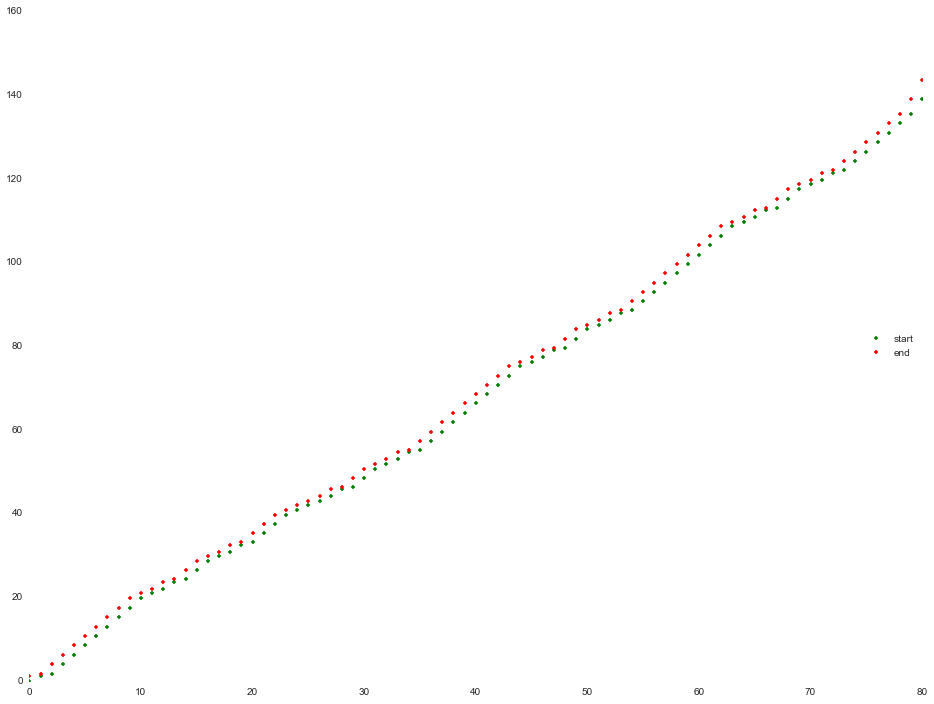

In [9]:
plot(df['start'], 'g.', label='start')
plot(df['end'], 'r.', label='end')
legend(loc='center right');

In [10]:
print('event count:', len(df))
print('total time:', df['end'].iloc[-1])
print('last start event time:', df['start'].iloc[-1])

event count: 81
total time: 143.6713
last start event time: 139.1356


In [11]:
df['duration'] = df['end'] - df['start']
df['duration'].describe()

count    81.000000
mean      1.773720
std       0.725742
min       0.514900
25%       1.123500
50%       2.176800
75%       2.246900
max       4.535700
Name: duration, dtype: float64

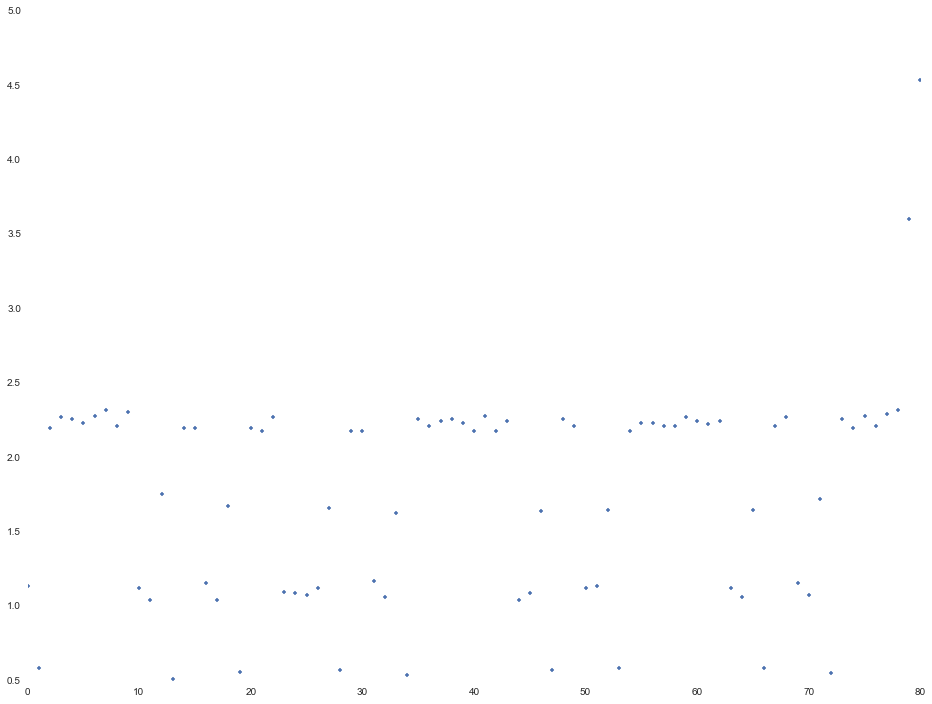

In [12]:
plot(df['duration'], '.');

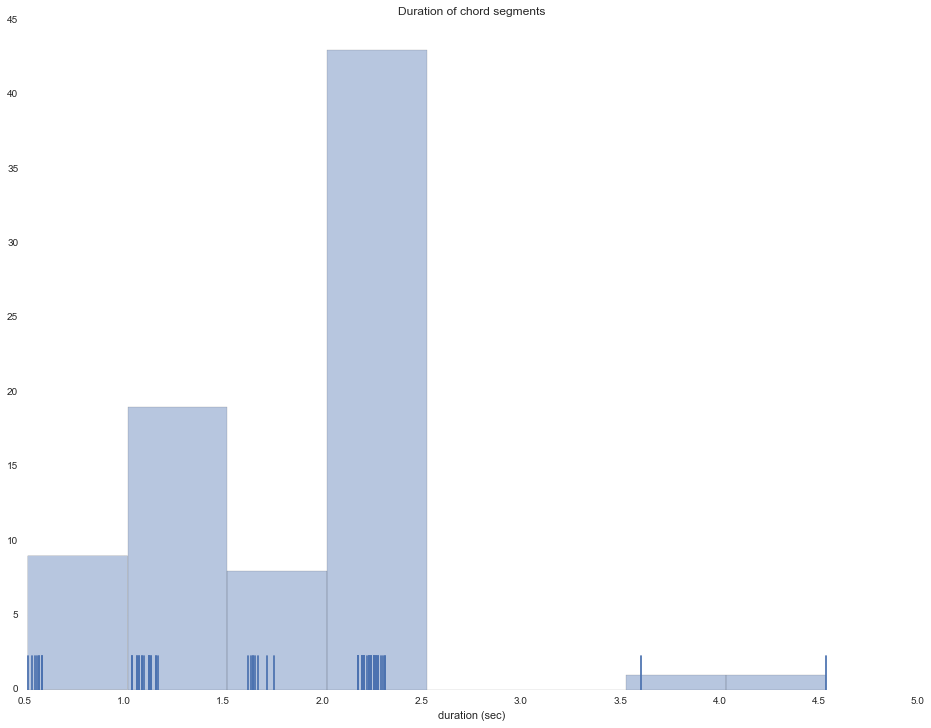

In [13]:
sns.distplot(df['duration'], axlabel='duration (sec)', rug=True, kde=False)
title('Duration of chord segments');

Time map is just a scatter plot of time to previous event vs. time to next event. Let's compute the differences.

In [14]:
def add_differences(df, col='start'):
    df['prev'] = df[col].diff(1)
    df['next'] = -df[col].diff(-1)
    return df
df_diff = add_differences(df).dropna()

In [15]:
df_diff.head()

,start,end,chord,duration,prev,next
1,1.1350,1.7208,N,0.5858,1.1350,0.5858
2,1.7208,3.9210,Eb:min,2.2002,0.5858,2.2002
3,3.9210,6.1913,D,2.2703,2.2002,2.2703
4,6.1913,8.4500,Db,2.2587,2.2703,2.2587
5,8.4500,10.6852,Bb:min,2.2352,2.2587,2.2352


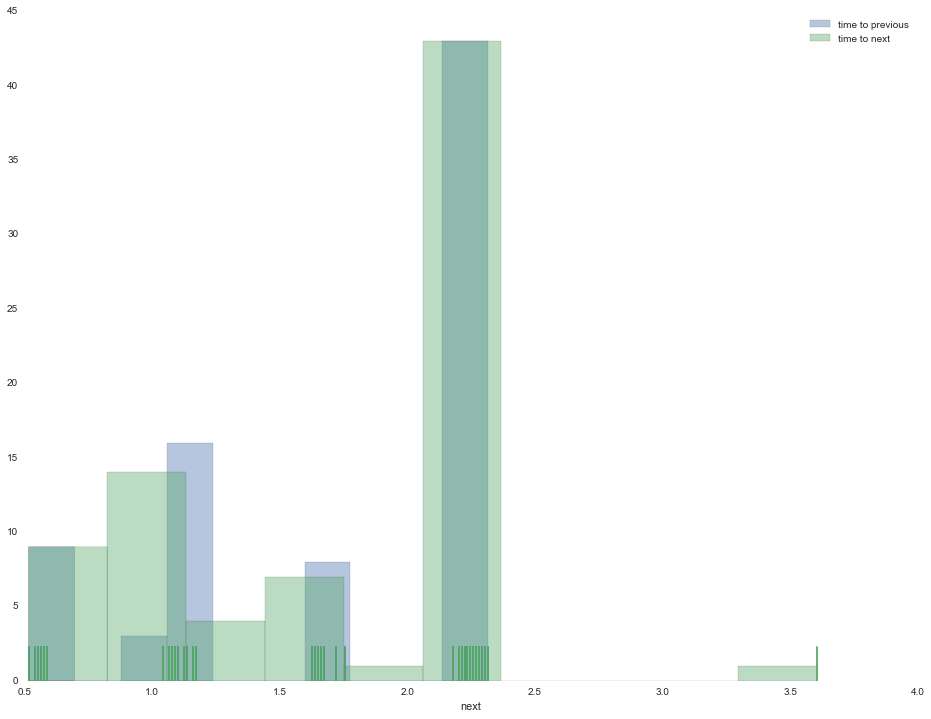

In [16]:
sns.distplot(df_diff['prev'], label='time to previous', rug=True, kde=False, bins=10)
sns.distplot(df_diff['next'], label='time to next', rug=True, kde=False, bins=10)
legend();

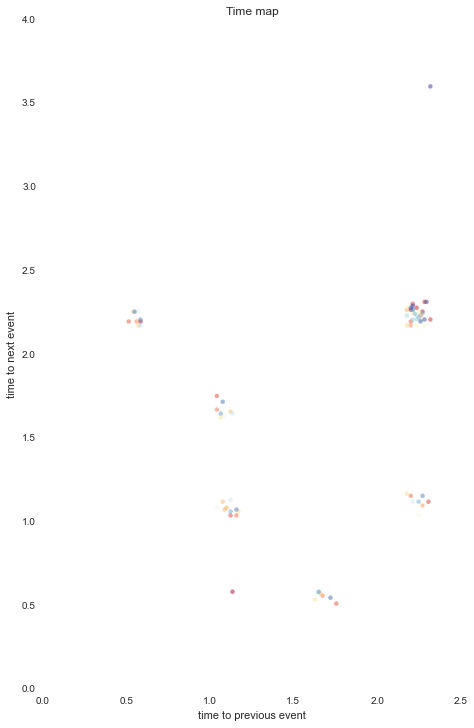

In [124]:
def plot_time_map(df_diff, coloring=None):
    cmap = plt.cm.get_cmap('RdYlBu')
    c = np.linspace(0, 1, len(df_diff)) if coloring is None else coloring
    scatter(df_diff['prev'], df_diff['next'],
            alpha=0.5,
            c=c,
            cmap=cmap,
            edgecolors='none')
    xlabel('time to previous event')
    ylabel('time to next event')
    title('Time map')
    axes().set_aspect('equal')

plot_time_map(df_diff)

In [233]:
def unique_chords(df):
    return sorted(df['chord'].unique())

for chord in unique_chords(df):
    print(chord)

A
A:7
Bb:min
D
D:9
Db
E:min
E:min7
Eb:min
F#:min
F:dim
G
G:min
N


In [19]:
import glob

In [197]:
files = glob.glob(data_dir + '*/*.lab')
tracks = pd.DataFrame({
    'album': [f.split('/')[-2] for f in files],
    'name': [f.split('/')[-1].replace('.lab', '') for f in files]
})
tracks

,album,name
0,A_Hard_Day_s_Night,01-A_Hard_Day_s_Night
1,A_Hard_Day_s_Night,02-I_Should_Have_Known_Better
2,A_Hard_Day_s_Night,03-If_I_Fell
3,A_Hard_Day_s_Night,04-I_m_Happy_Just_To_Dance_With_You
4,A_Hard_Day_s_Night,05-And_I_Love_Her
5,A_Hard_Day_s_Night,06-Tell_Me_Why
6,A_Hard_Day_s_Night,07-Can_t_Buy_Me_Love
7,A_Hard_Day_s_Night,08-Any_Time_At_All
8,A_Hard_Day_s_Night,09-I_ll_Cry_Instead
9,A_Hard_Day_s_Night,10-Things_We_Said_Today


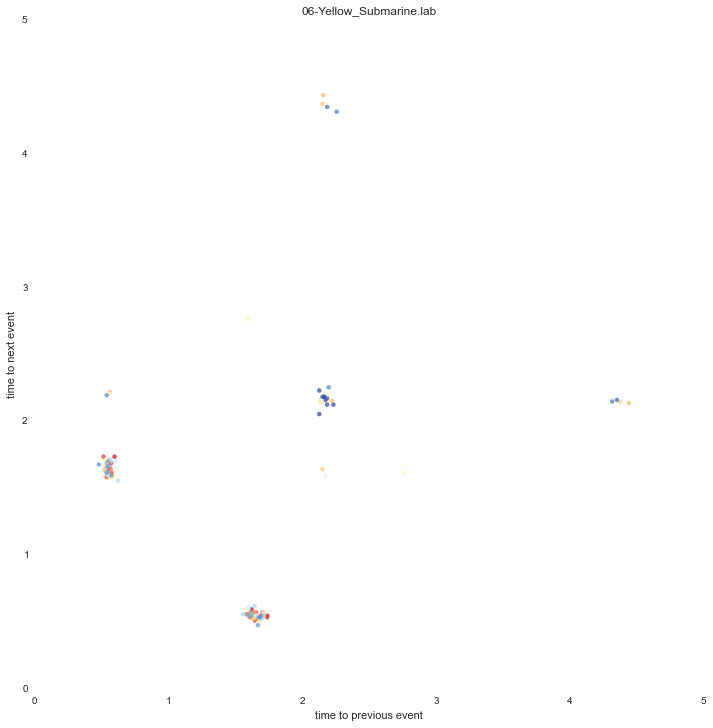

In [22]:
def time_map_for_file(file):
    plot_time_map(add_differences(read_chord_file(file)).dropna())
    title(file.split('/')[-1])

time_map_for_file(files[100])

In [257]:
def add_track_id(df, track_id):
    df['track_id'] = track_id
    return df

selected_files = files
track_dfs = (read_chord_file(file) for file in selected_files)
track_dfs = (add_track_id(df, track_id) for (track_id, df) in enumerate(track_dfs))
track_dfs = (add_differences(df) for df in track_dfs)
all_events = pd.concat(track_dfs)
df_diff_all = all_events.dropna()

In [256]:
df_diff_all.head()

,start,end,chord,track_id,prev,next
1,2.9632,6.1260,G:sus4(b7),0,2.9632,3.1628
2,6.1260,6.9944,G,0,3.1628,0.8684
3,6.9944,7.8364,C,0,0.8684,0.8420
4,7.8364,9.5203,G,0,0.8420,1.6839
5,9.5203,11.2392,F,0,1.6839,1.7189


In [55]:
print('song count:', len(selected_files))
print('total diff event count in all songs:', len(df_diff_all))

song count: 180
total diff event count in all songs: 14232


In [56]:
df_diff_all.describe()

,start,end,track_id,prev,next
count,14232.000000,14232.000000,14232.000000,14232.000000,14232.000000
mean,84.067812,86.063325,88.922780,1.945859,1.995538
std,60.787896,60.953629,52.464723,2.171124,2.518006
min,0.008400,0.592000,0.000000,0.008400,0.175600
25%,38.146650,40.018525,44.000000,1.067100,1.072175
50%,77.404900,79.425650,88.000000,1.616200,1.627900
75%,117.742425,119.546525,136.000000,2.110325,2.123400
max,464.579100,465.017500,179.000000,137.559800,137.559800


In [119]:
def outlier_quantiles(df, cols=['next','prev'], tolerance=0.01):
    df_nonzero = df[cols][df[cols] > 0]
    quantiles = df_nonzero.quantile([tolerance, 1 - tolerance])
    return quantiles

outlier_limits = outlier_quantiles(df_diff_all)
outlier_limits

,next,prev
0.01,0.399427,0.3892
0.99,8.766592,7.9920


In [120]:
def remove_outliers(df, limits, cols=['next','prev']):
    outlier_idxs = df['next'] == np.nan # just an array of False of proper length
    for col in cols:
        q_min, q_max = limits[col]
        print(q_min, q_max)
        series = df[col]
        idxs = series < q_min
        print(col, 'min', sum(idxs))
        outlier_idxs |= idxs
        idxs = series > q_max
        outlier_idxs |= idxs
        print(col, 'max', sum(idxs))
    print('outlier count:', sum(outlier_idxs), 'precentage:', sum(outlier_idxs) / len(df) * 100, '%')
    return df[~outlier_idxs]

In [121]:
df_diff_all_cleaned = remove_outliers(df_diff_all, outlier_limits)

0.399427 8.766592
next min 143
next max 143
0.3892 7.992
prev min 143
prev max 143
outlier count: 498 precentage: 3.49915682968 %


In [122]:
df_diff_all_cleaned.describe()

,start,end,track_id,prev,next
count,13734.000000,13734.000000,13734.000000,13734.000000,13734.000000
mean,83.359791,85.198534,89.032984,1.819995,1.838768
std,58.986189,59.008221,52.300960,1.112740,1.135214
min,0.422200,1.234900,0.000000,0.389200,0.400600
25%,38.451675,40.288425,45.000000,1.078625,1.083500
50%,77.325950,79.169200,89.000000,1.616200,1.627000
75%,117.114625,118.877025,135.000000,2.087650,2.102000
max,464.579100,465.017500,179.000000,7.992000,8.713600


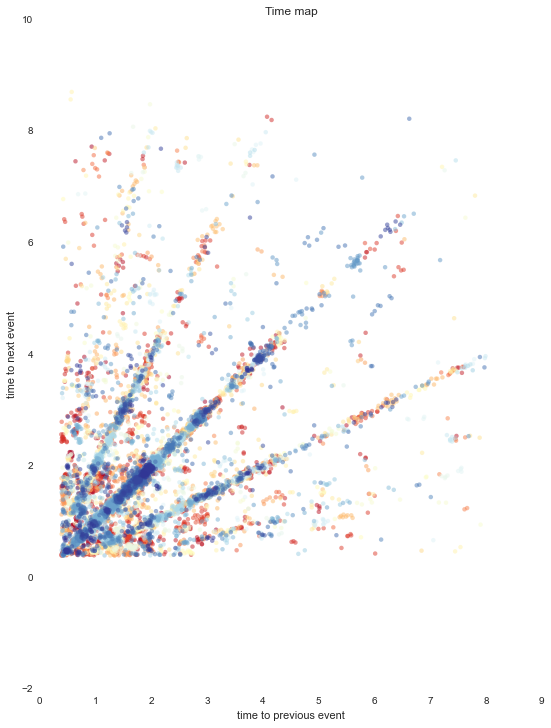

In [125]:
plot_time_map(df_diff_all_cleaned, coloring=df_diff_all_cleaned['track_id'])

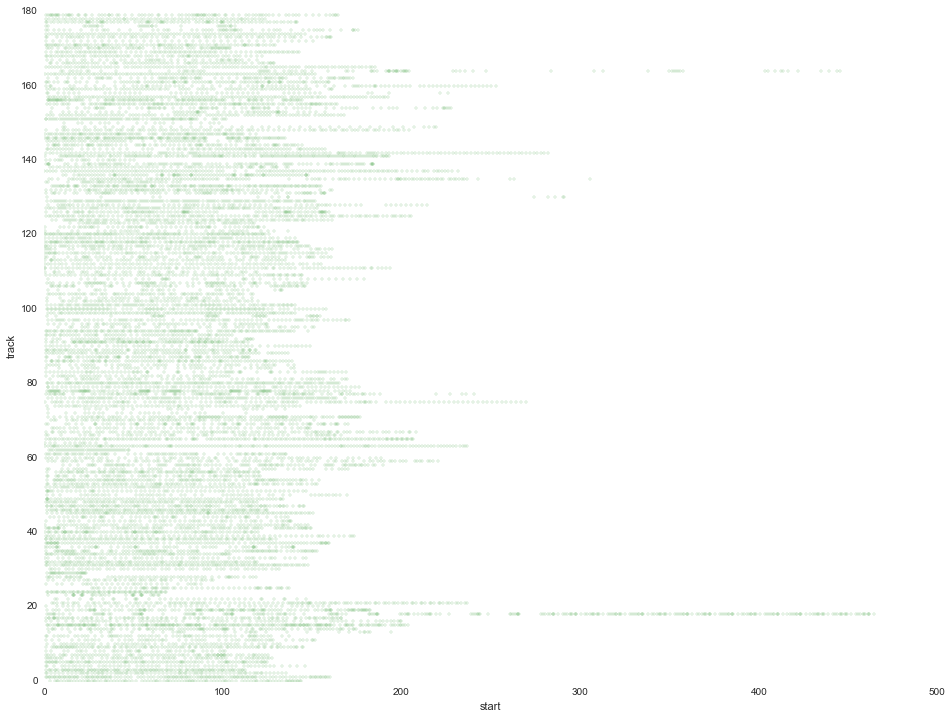

In [229]:
def plot_tracks(df, col, track_order=None):
    track_id = df['track_id']
    y = track_id
    if track_order is not None:
        mapping = track_order.argsort()
        y = y.apply(lambda x: mapping[x])
    plot(df[col], y, 'g.', label=col, alpha=0.1)
    xlabel(col)
    ylabel('track')

plot_tracks(df_diff_all, 'start')

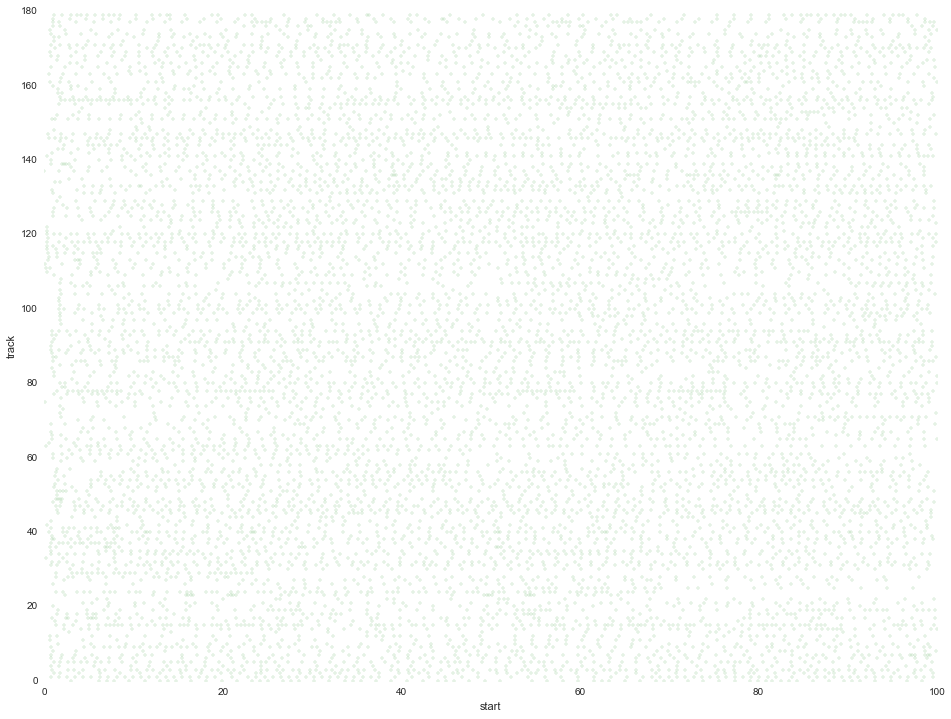

In [147]:
def select_time_range(df, start, end, col='start'):
    series = df[col]
    return df[(series >= start) & (series <= end)]

plot_tracks(select_time_range(df_diff_all, 0, 100), 'start')

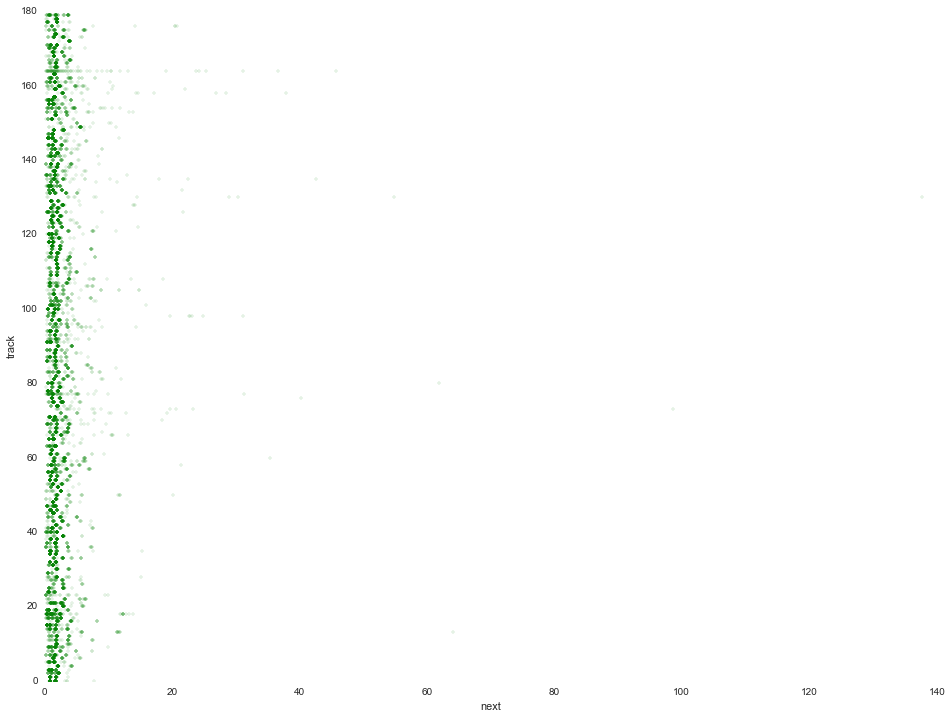

In [150]:
plot_tracks(df_diff_all, 'next')

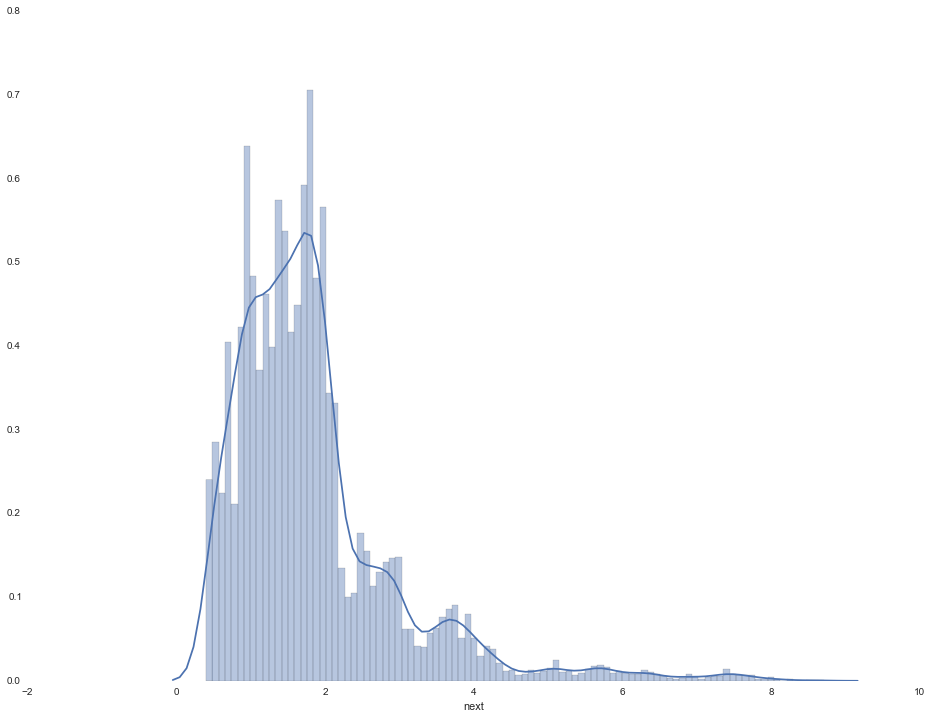

In [164]:
sns.distplot(df_diff_all_cleaned['next'])

In [166]:
next_medians = df_diff_all.groupby('track_id')['next'].median()
next_medians.describe()

count    180.000000
mean       1.915916
std        0.891143
min        0.574150
25%        1.373150
50%        1.771800
75%        2.112662
max        6.257850
Name: next, dtype: float64

In [198]:
tracks['next_median'] = next_medians
tracks_by_next_median = next_medians.argsort()
tracks.ix[tracks_by_next_median]

,album,name,next_median
78,Magical_Mystery_Tour,09-Penny_Lane,0.57415
29,Abbey_Road,17-Her_Majesty,0.60400
146,The_White_Album_Disc_1,11-Blackbird,0.67385
24,Abbey_Road,12-Polythene_Pam,0.73220
118,Rubber_Soul,10-I_m_Looking_Through_You,0.73470
156,The_White_Album_Disc_2,04-Everybody_s_Got_Something_To_Hide_Except_Me...,0.80230
15,Abbey_Road,03-Maxwell_s_Silver_Hammer,0.90140
23,Abbey_Road,11-Mean_Mr_Mustard,0.90650
54,Help_,11-Tell_Me_What_You_See,0.92130
1,A_Hard_Day_s_Night,02-I_Should_Have_Known_Better,0.93530


Tracks ordered by median time difference between events.

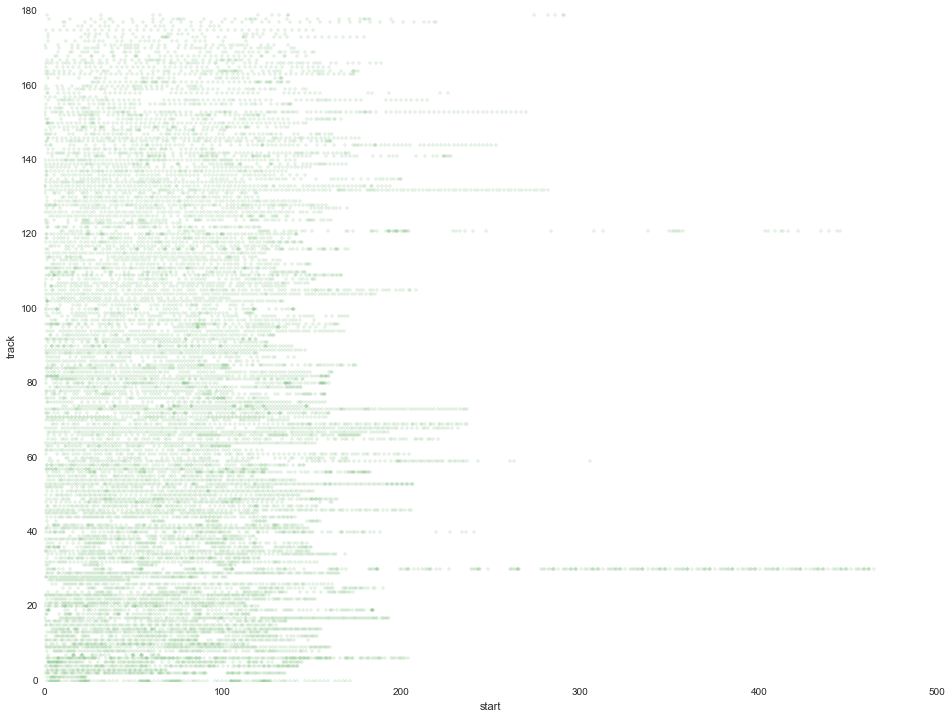

In [230]:
plot_tracks(df_diff_all, 'start', tracks_by_next_median)

In [253]:
chords = df_diff_all['chord'].value_counts()
print('unique chord count:', len(chords))
print('top 20 chords:')
chords[:20]

unique chord count: 406
top 20 chords:


A         1563
G         1379
D         1348
E         1032
C          958
B          500
F          489
A:min      365
E:min      335
Bb         318
B:min      293
F#:min     291
F#         199
D:min      197
C#:min     165
Eb         161
Ab         153
G:7        150
D/5        135
D:7        132
dtype: int64

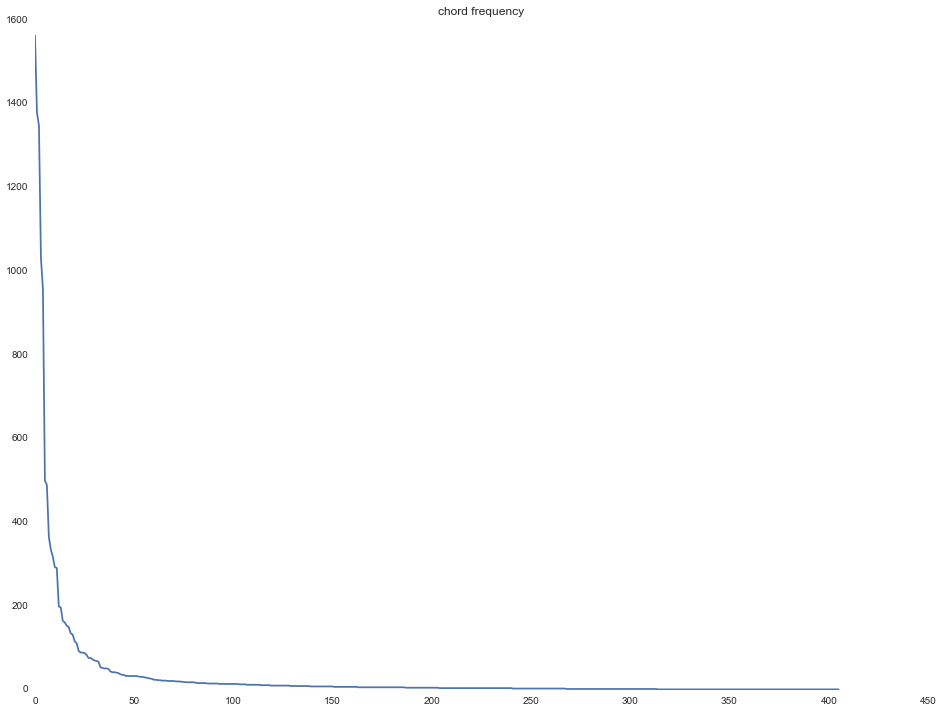

In [252]:
plot(chords)
title('chord frequency');

In [265]:
track_events = all_events[all_events['track_id'] == 0]